In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
sns.set_theme(style='darkgrid')
%matplotlib inline

In [2]:
df= pd.read_csv('gld_price_data.csv')
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
df.duplicated().sum()

0

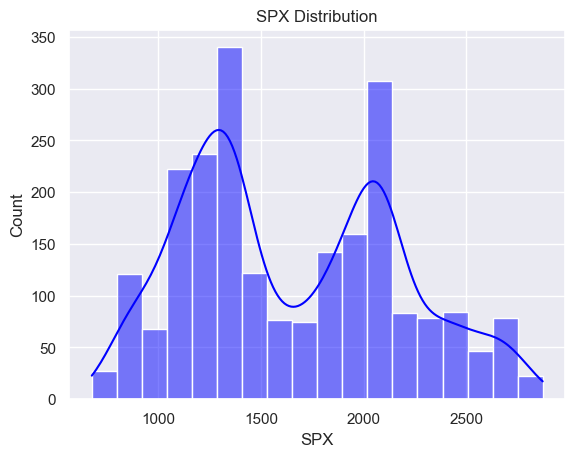

In [7]:
sns.histplot(df, x='SPX', kde=True, color='blue')
plt.title('SPX Distribution')
plt.show()

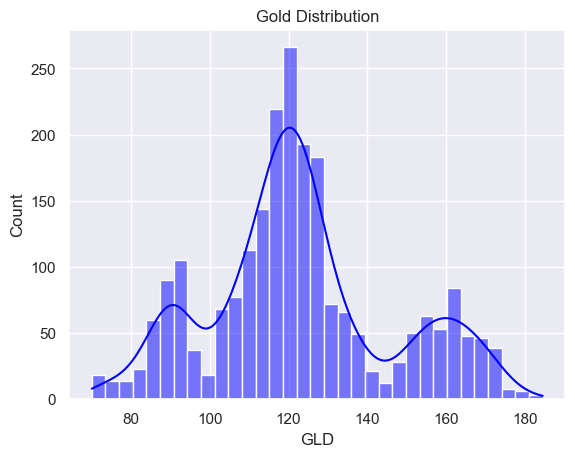

In [8]:
sns.histplot(df, x='GLD', kde=True, color='blue')
plt.title('Gold Distribution')
plt.show()

<Axes: >

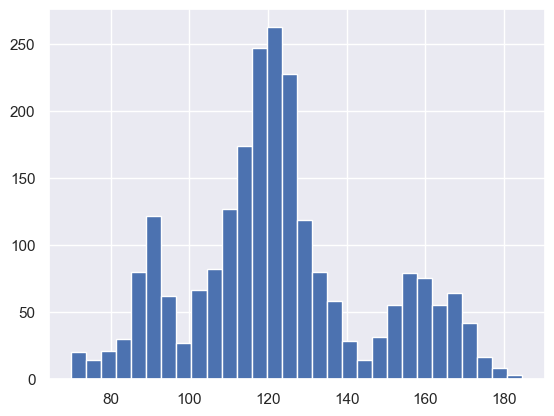

In [27]:
df['GLD'].hist(bins=30)

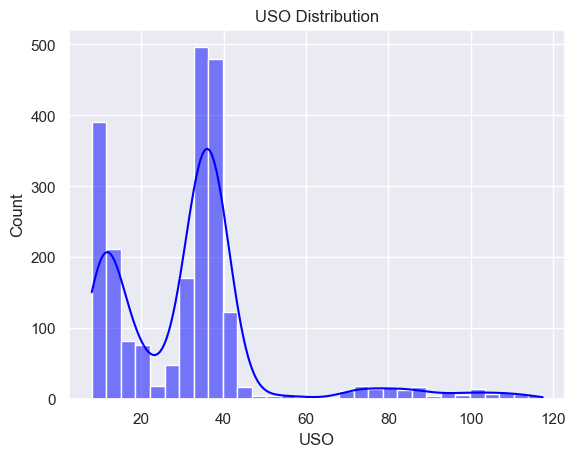

In [32]:
sns.histplot(df, x='USO', kde=True, color='blue')
plt.title('USO Distribution')
plt.show()

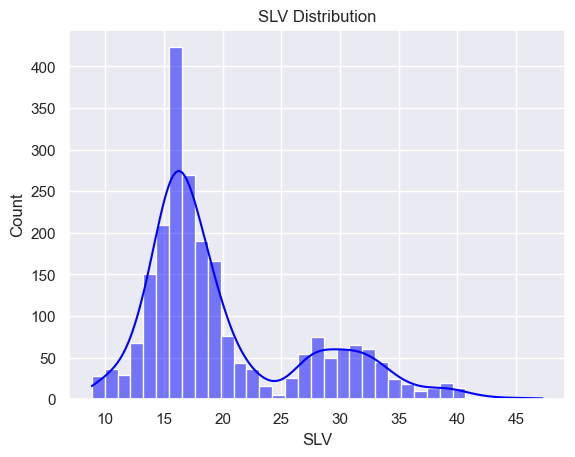

In [33]:
sns.histplot(df, x='SLV', kde=True, color='blue')
plt.title('SLV Distribution')
plt.show()

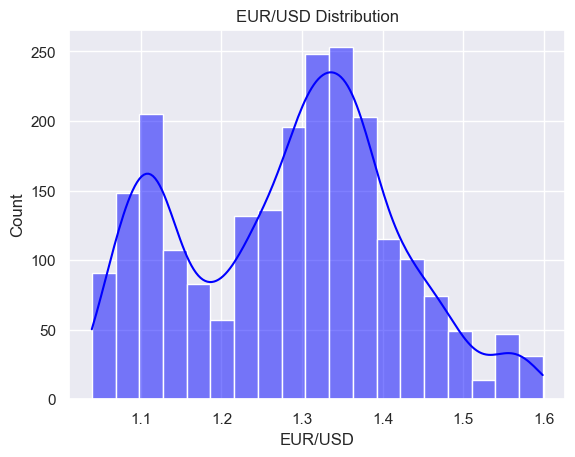

In [37]:
sns.histplot(df, x='EUR/USD', kde=True, color='blue')
plt.title('EUR/USD Distribution')
plt.show()

In [57]:
correlation= df.corr()

C:\Users\CH\AppData\Local\Temp\ipykernel_27156\2306004012.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df.corr()


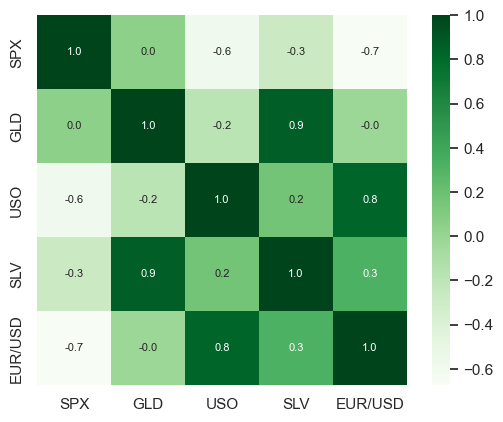

In [59]:
sns.heatmap(correlation, cbar=True,square=True, annot=True,fmt='.1f', annot_kws={'size':8}, cmap='Greens')
plt.show()

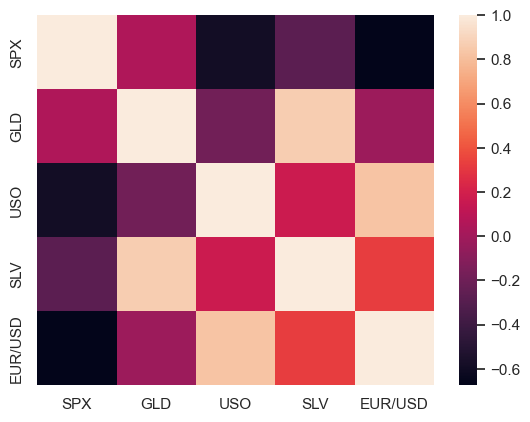

In [60]:
sns.heatmap(correlation)
plt.show()

In [61]:
df.corr()['GLD']

C:\Users\CH\AppData\Local\Temp\ipykernel_27156\90166631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['GLD']


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [63]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [64]:
x= df.drop(columns=['GLD', 'Date'], axis=1)
y= df['GLD']

In [65]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1832, 4) (1832,)
(458, 4) (458,)


In [67]:
rr= RandomForestRegressor(n_estimators=100)
rr

RandomForestRegressor()

In [68]:
rr.fit(x_train, y_train)

RandomForestRegressor()

In [84]:
train_data_predictions= rr.predict(x_train)
test_data_predictions= rr.predict(x_test)
print(train_data_predictions[:1], 'and', test_data_predictions[:1])

[109.9941977] and [168.49869907]


In [85]:
r2_score(test_data_predictions, y_test)

0.988614136951031